In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch

In [2]:
df = pd.read_csv('alzheimers_disease_data.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [19]:
import matplotlib as mpl

mpl.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 11,
    "axes.titlesize": 11,
    "axes.labelsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
})


In [4]:
# Checking for Zero-Variance Features
zero_var = df.columns[df.nunique() == 1]
zero_var

Index(['DoctorInCharge'], dtype='object')

In [6]:
# Checking that each feature matches the defined category
df.dtypes

PatientID                      int64
Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
A

In [7]:
#  Select Data
df = df.drop(columns=['PatientID', 'DoctorInCharge'])

In [8]:
# Displaying the distributions of the variables

In [9]:
# Continuous variables

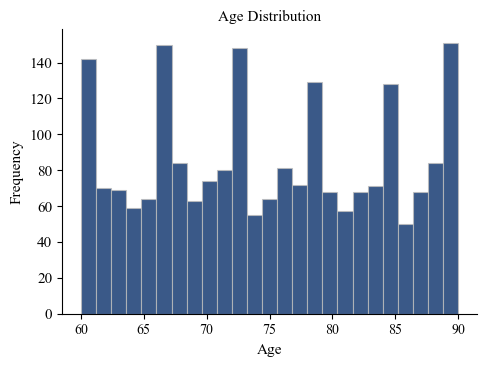

In [136]:
# Plot a histogram using the plot accessor

plt.figure(figsize=(5, 3.8))

plt.hist(
    df["Age"],
    bins=25,
    color="#08306b",
    alpha=0.8,
    edgecolor="#bdbdbd",
    linewidth=0.8
)

plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()


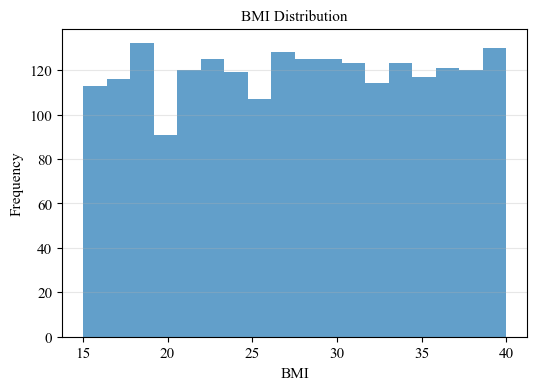

In [21]:
plt.figure(figsize=(6,4))

df['BMI'].plot.hist(
    bins=18,
    alpha=0.7
)

plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)

plt.show()

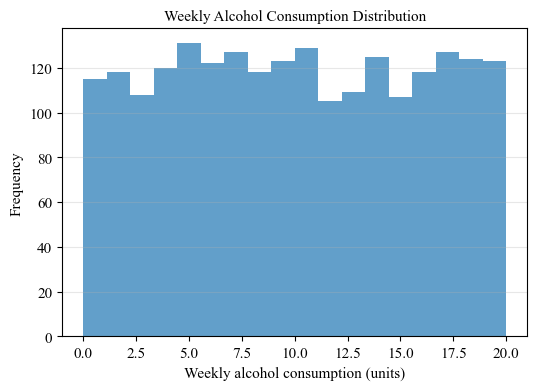

In [22]:
plt.figure(figsize=(6,4))

df['AlcoholConsumption'].plot.hist(
    bins=18,
    alpha=0.7
)

plt.title('Weekly Alcohol Consumption Distribution')
plt.xlabel('Weekly alcohol consumption (units)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)

plt.show()


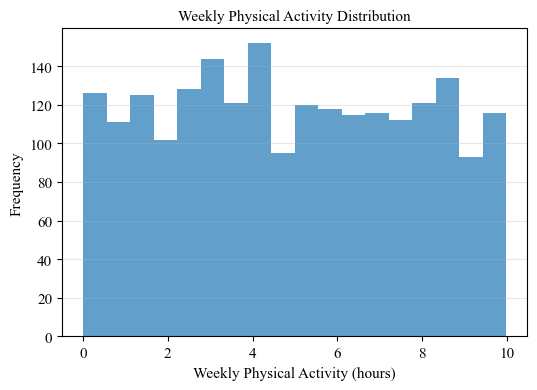

In [23]:
plt.figure(figsize=(6,4))

df['PhysicalActivity'].plot.hist(
    bins=18,
    alpha=0.7
)

plt.title('Weekly Physical Activity Distribution')
plt.xlabel('Weekly Physical Activity (hours)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)

plt.show()


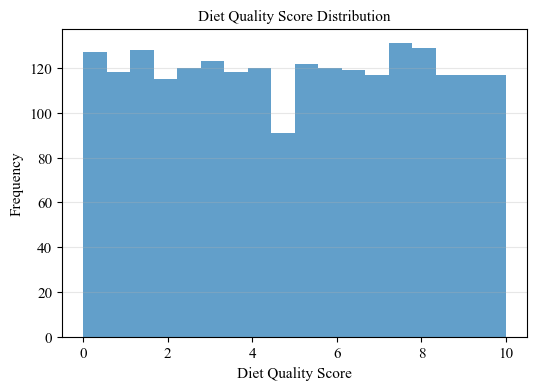

In [24]:
plt.figure(figsize=(6,4))

df['DietQuality'].plot.hist(
    bins=18,
    alpha=0.7
)

plt.title('Diet Quality Score Distribution')
plt.xlabel('Diet Quality Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)

plt.show()

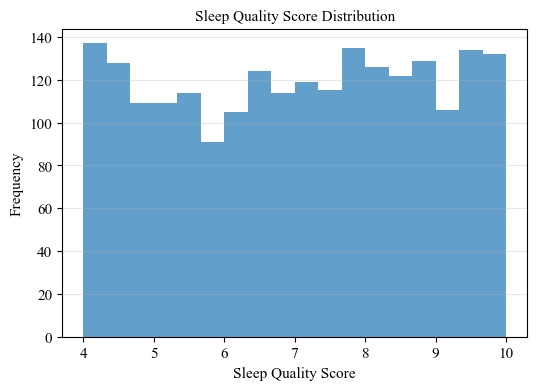

In [25]:
plt.figure(figsize=(6,4))

df['SleepQuality'].plot.hist(
    bins=18,
    alpha=0.7
)

plt.title('Sleep Quality Score Distribution')
plt.xlabel('Sleep Quality Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)

plt.show()

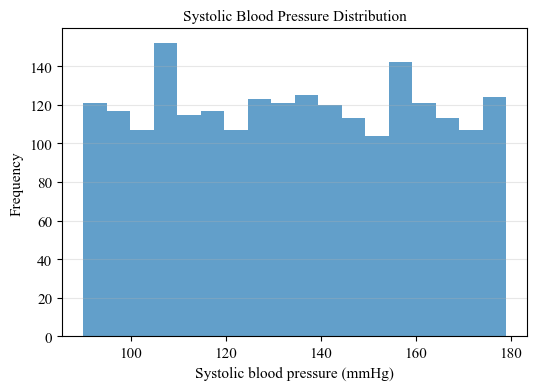

In [26]:
plt.figure(figsize=(6,4))

df['SystolicBP'].plot.hist(
    bins=18,
    alpha=0.7
)

plt.title('Systolic Blood Pressure Distribution')
plt.xlabel('Systolic blood pressure (mmHg)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)

plt.show()

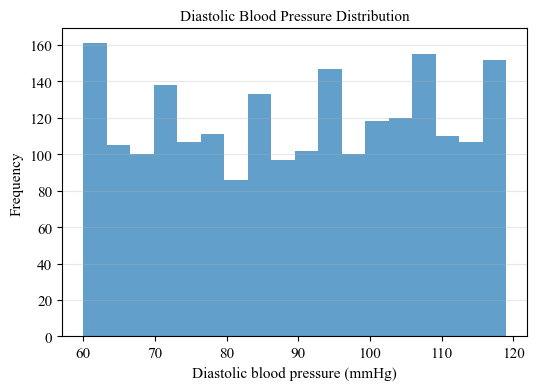

In [27]:
plt.figure(figsize=(6,4))

df['DiastolicBP'].plot.hist(
    bins=18,
    alpha=0.7
)

plt.title('Diastolic Blood Pressure Distribution')
plt.xlabel('Diastolic blood pressure (mmHg)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)

plt.show()

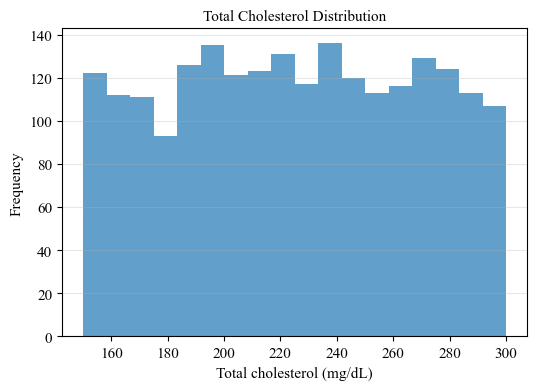

In [28]:
plt.figure(figsize=(6,4))

df['CholesterolTotal'].plot.hist(bins=18, alpha=0.7)

plt.title('Total Cholesterol Distribution')
plt.xlabel('Total cholesterol (mg/dL)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)

plt.show()


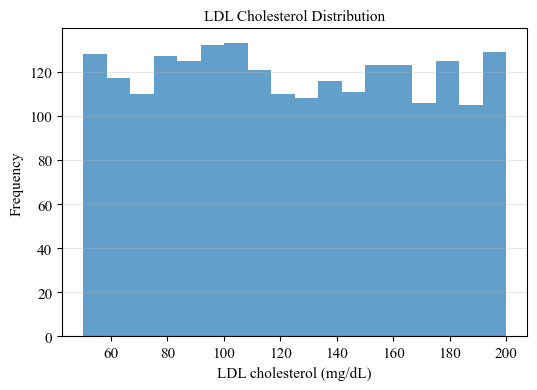

In [29]:
plt.figure(figsize=(6,4))

df['CholesterolLDL'].plot.hist(bins=18, alpha=0.7)

plt.title('LDL Cholesterol Distribution')
plt.xlabel('LDL cholesterol (mg/dL)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)

plt.show()


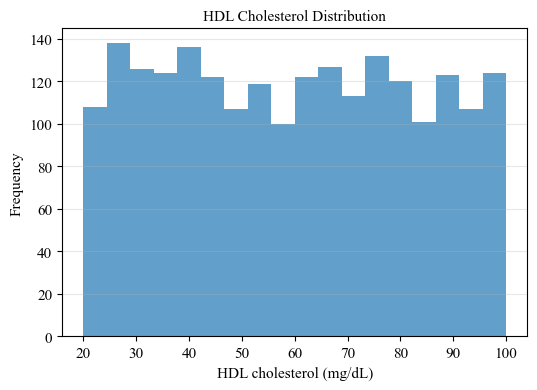

In [30]:
plt.figure(figsize=(6,4))

df['CholesterolHDL'].plot.hist(bins=18, alpha=0.7)

plt.title('HDL Cholesterol Distribution')
plt.xlabel('HDL cholesterol (mg/dL)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)

plt.show()


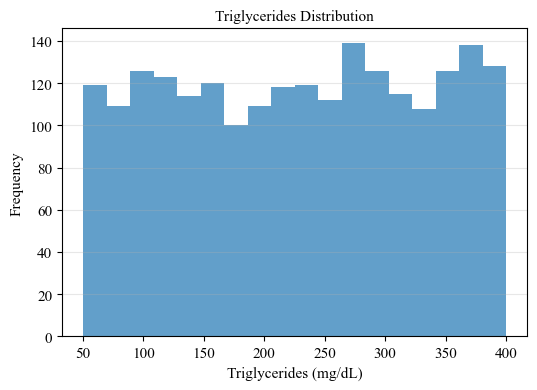

In [31]:
plt.figure(figsize=(6,4))

df['CholesterolTriglycerides'].plot.hist(bins=18, alpha=0.7)

plt.title('Triglycerides Distribution')
plt.xlabel('Triglycerides (mg/dL)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)

plt.show()


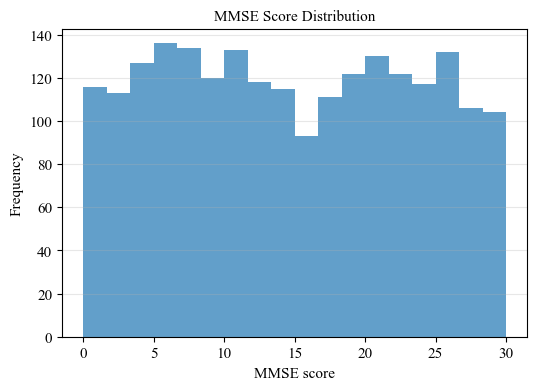

In [32]:
plt.figure(figsize=(6,4))

df['MMSE'].plot.hist(bins=18, alpha=0.7)

plt.title('MMSE Score Distribution')
plt.xlabel('MMSE score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)

plt.show()


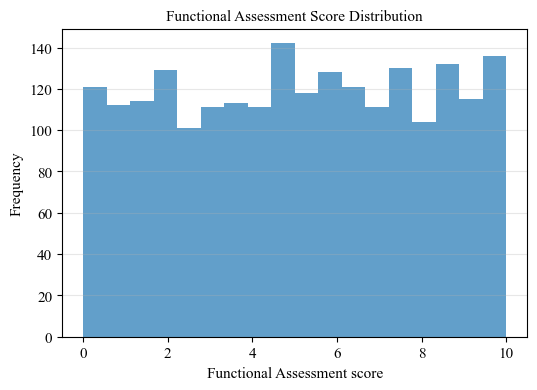

In [33]:
plt.figure(figsize=(6,4))

df['FunctionalAssessment'].plot.hist(bins=18, alpha=0.7)
plt.title('Functional Assessment Score Distribution')
plt.xlabel('Functional Assessment score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)

plt.show()


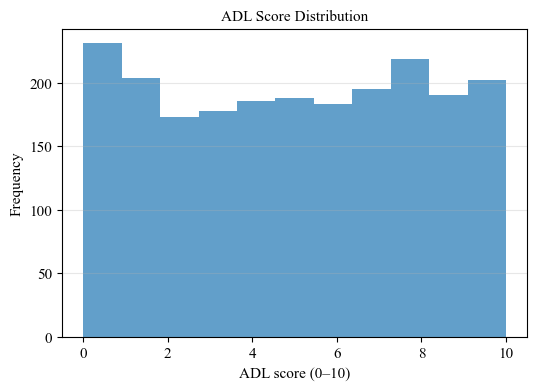

In [34]:
plt.figure(figsize=(6,4))
df['ADL'].plot.hist(bins=11, alpha=0.7)
plt.title('ADL Score Distribution')
plt.xlabel('ADL score (0–10)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.show()

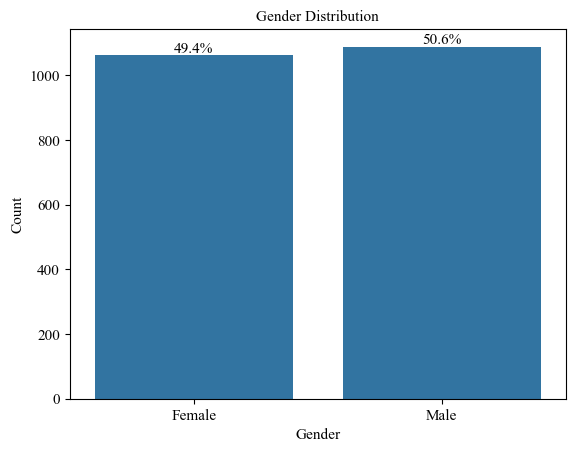

In [35]:
ax = sns.countplot(x='Gender', data=df)
total = len(df)

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height/total:.1%}',
        ha='center',
        va='bottom'
    )

plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.show()



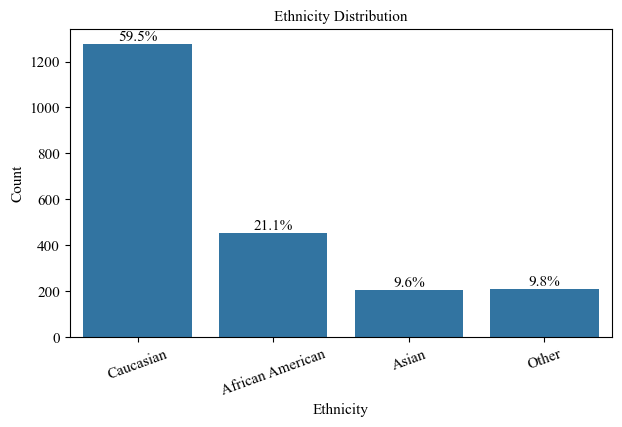

In [36]:
plt.figure(figsize=(7,4))
ax = sns.countplot(x='Ethnicity', data=df)

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height/total:.1%}',
        ha='center',
        va='bottom'
    )

plt.xticks(
    [0, 1, 2, 3],
    ['Caucasian', 'African American', 'Asian', 'Other'],
    rotation=20
)

plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.title('Ethnicity Distribution')
plt.show()


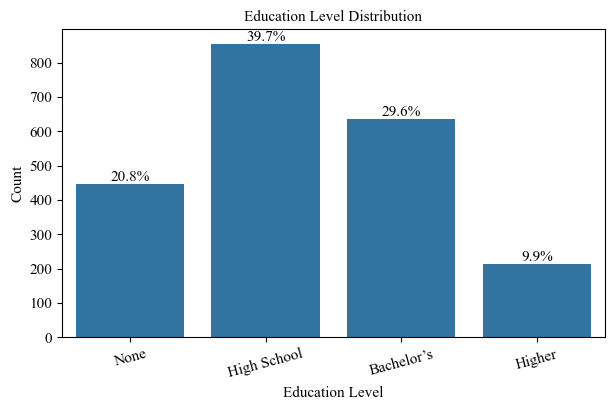

In [37]:
plt.figure(figsize=(7,4))
ax = sns.countplot(
    x='EducationLevel',
    data=df,
    order=[0, 1, 2, 3]
)

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height/total:.1%}',
        ha='center',
        va='bottom'
    )

plt.xticks(
    [0, 1, 2, 3],
    ['None', 'High School', "Bachelor’s", 'Higher'],
    rotation=15
)

plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution')
plt.show()


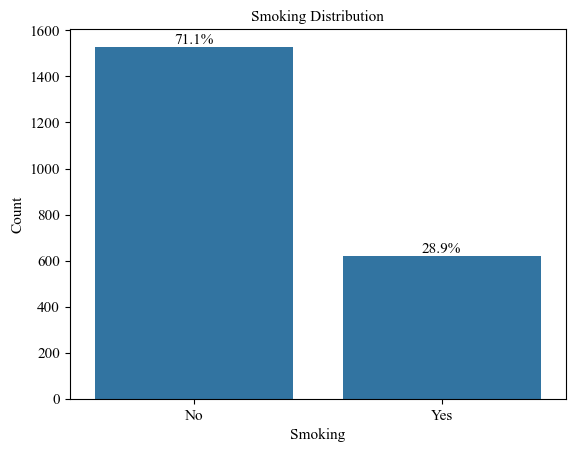

In [38]:
ax = sns.countplot(x='Smoking', data=df)
total = len(df)

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height/total:.1%}',
        ha='center',
        va='bottom'
    )

plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Smoking Distribution')
plt.ylabel('Count')
plt.show()


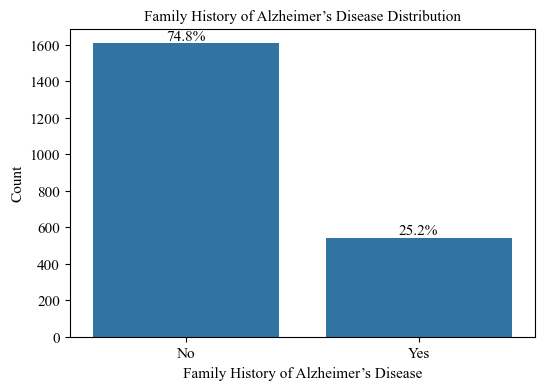

In [39]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='FamilyHistoryAlzheimers', data=df)

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height/total:.1%}',
        ha='center',
        va='bottom'
    )

plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Family History of Alzheimer’s Disease')
plt.ylabel('Count')
plt.title('Family History of Alzheimer’s Disease Distribution')
plt.show()


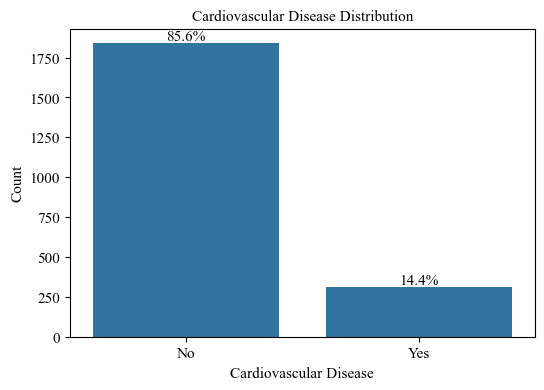

In [40]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='CardiovascularDisease', data=df)

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height/total:.1%}',
        ha='center',
        va='bottom'
    )

plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Count')
plt.title('Cardiovascular Disease Distribution')
plt.show()


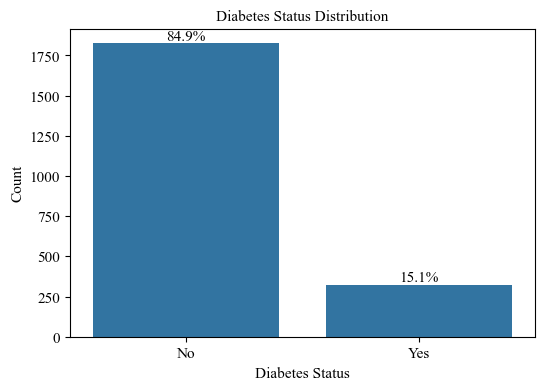

In [41]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Diabetes', data=df)

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height/total:.1%}',
        ha='center',
        va='bottom'
    )

plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.title('Diabetes Status Distribution')
plt.show()

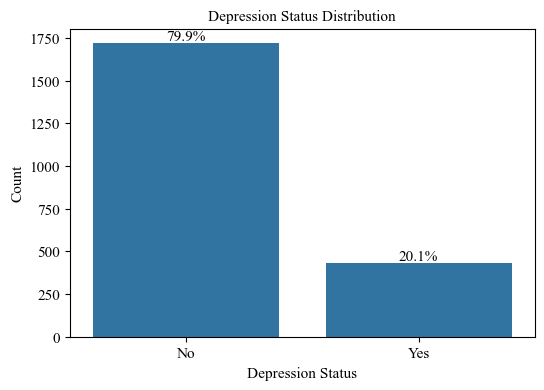

In [42]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Depression', data=df)

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height/total:.1%}',
        ha='center',
        va='bottom'
    )

plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Depression Status')
plt.ylabel('Count')
plt.title('Depression Status Distribution')
plt.show()

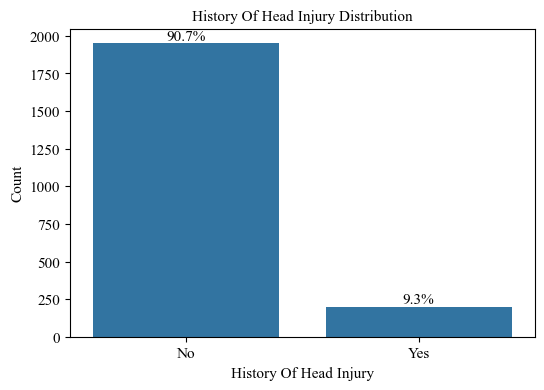

In [43]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='HeadInjury', data=df)

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height/total:.1%}',
        ha='center',
        va='bottom'
    )

plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('History Of Head Injury')
plt.ylabel('Count')
plt.title('History Of Head Injury Distribution')
plt.show()

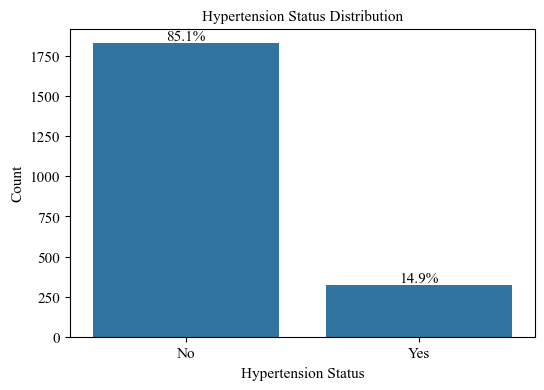

In [44]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Hypertension', data=df)

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height/total:.1%}',
        ha='center',
        va='bottom'
    )

plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Hypertension Status')
plt.ylabel('Count')
plt.title('Hypertension Status Distribution')
plt.show()

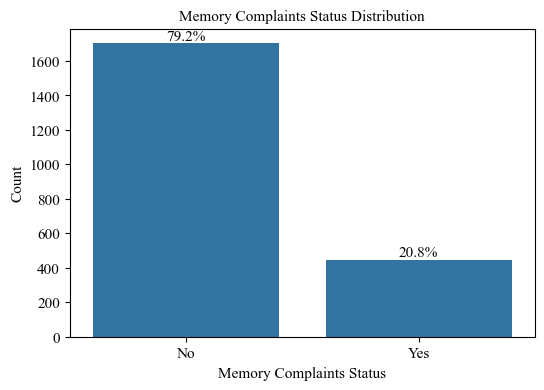

In [45]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='MemoryComplaints', data=df)

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height/total:.1%}',
        ha='center',
        va='bottom'
    )

plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Memory Complaints Status')
plt.ylabel('Count')
plt.title('Memory Complaints Status Distribution')
plt.show()

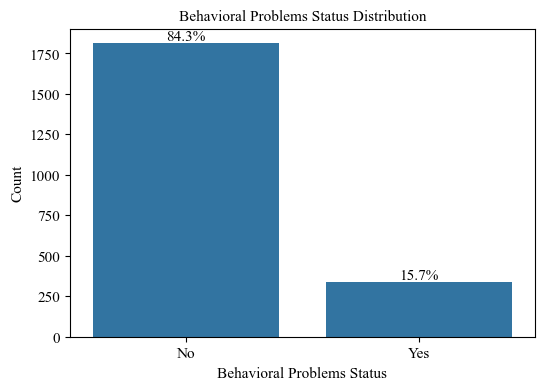

In [46]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='BehavioralProblems', data=df)

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height/total:.1%}',
        ha='center',
        va='bottom'
    )

plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Behavioral Problems Status')
plt.ylabel('Count')
plt.title('Behavioral Problems Status Distribution')
plt.show()

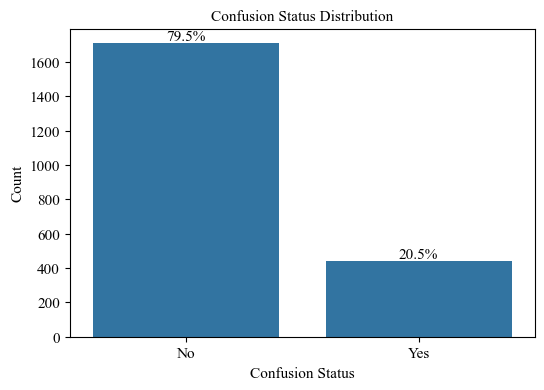

In [47]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Confusion', data=df)

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height/total:.1%}',
        ha='center',
        va='bottom'
    )

plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Confusion Status')
plt.ylabel('Count')
plt.title('Confusion Status Distribution')
plt.show()

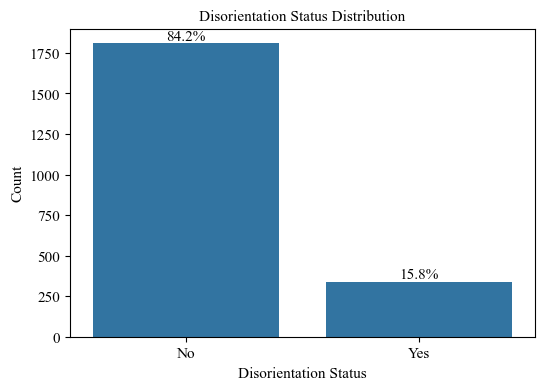

In [48]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Disorientation', data=df)

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height/total:.1%}',
        ha='center',
        va='bottom'
    )

plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Disorientation Status')
plt.ylabel('Count')
plt.title('Disorientation Status Distribution')
plt.show()

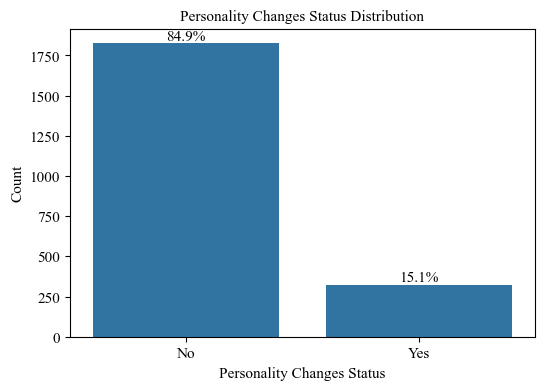

In [49]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='PersonalityChanges', data=df)

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height/total:.1%}',
        ha='center',
        va='bottom'
    )

plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Personality Changes Status')
plt.ylabel('Count')
plt.title('Personality Changes Status Distribution')
plt.show()

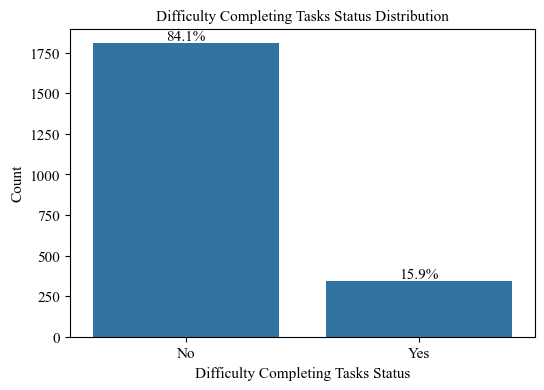

In [50]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='DifficultyCompletingTasks', data=df)

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height/total:.1%}',
        ha='center',
        va='bottom'
    )

plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Difficulty Completing Tasks Status')
plt.ylabel('Count')
plt.title('Difficulty Completing Tasks Status Distribution')
plt.show()

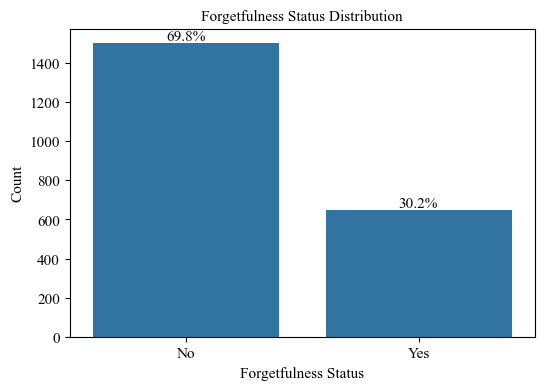

In [51]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Forgetfulness', data=df)

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height/total:.1%}',
        ha='center',
        va='bottom'
    )

plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Forgetfulness Status')
plt.ylabel('Count')
plt.title('Forgetfulness Status Distribution')
plt.show()

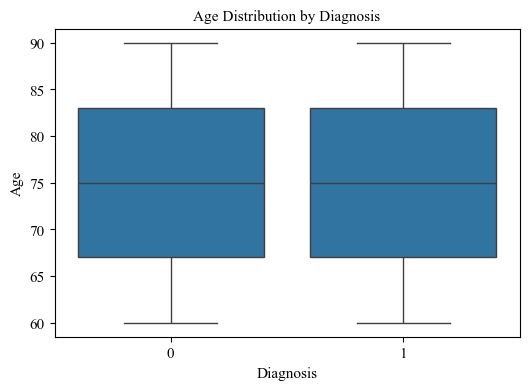

In [52]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Diagnosis', y='Age', data=df)
plt.title('Age Distribution by Diagnosis')
plt.show()

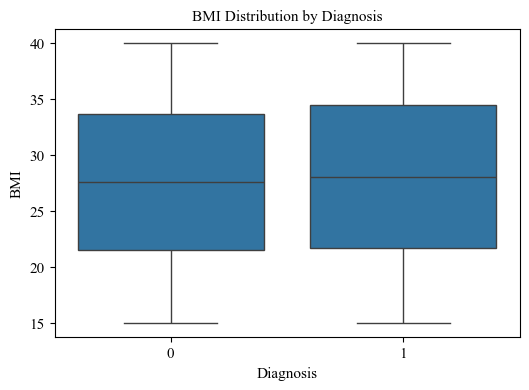

In [53]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Diagnosis', y='BMI', data=df)
plt.title('BMI Distribution by Diagnosis')
plt.show()

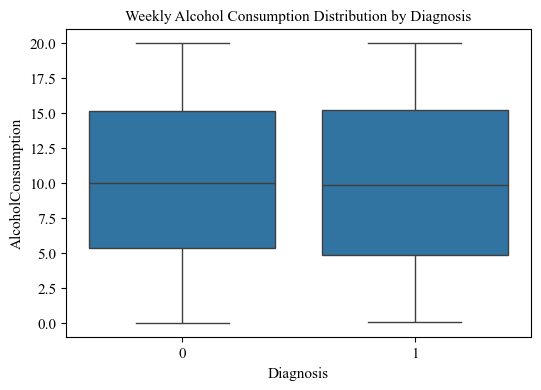

In [54]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Diagnosis', y='AlcoholConsumption', data=df)
plt.title('Weekly Alcohol Consumption Distribution by Diagnosis')
plt.show()

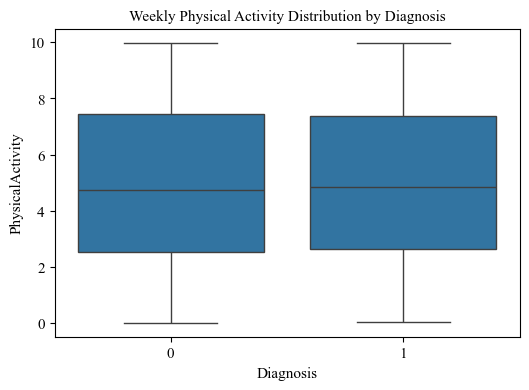

In [55]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Diagnosis', y='PhysicalActivity', data=df)
plt.title('Weekly Physical Activity Distribution by Diagnosis')
plt.show()

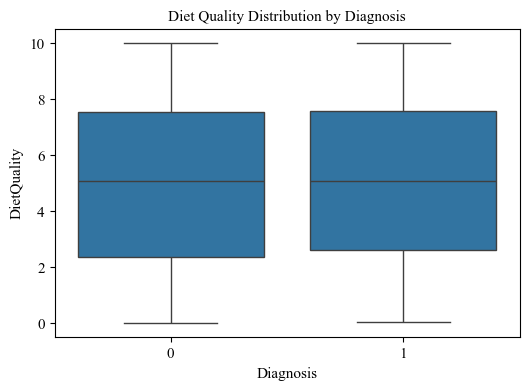

In [56]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Diagnosis', y='DietQuality', data=df)
plt.title('Diet Quality Distribution by Diagnosis')
plt.show()

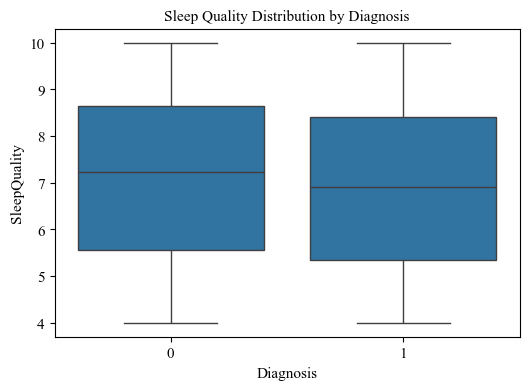

In [57]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Diagnosis', y='SleepQuality', data=df)
plt.title('Sleep Quality Distribution by Diagnosis')
plt.show()

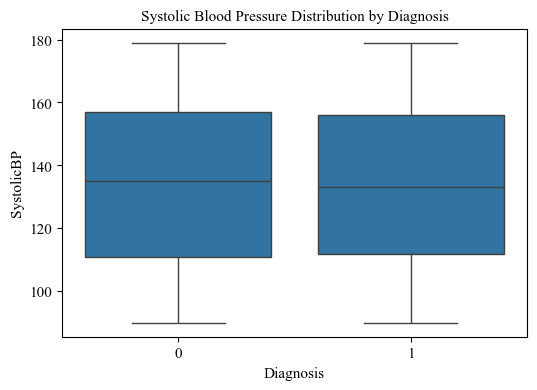

In [58]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Diagnosis', y='SystolicBP', data=df)
plt.title('Systolic Blood Pressure Distribution by Diagnosis')
plt.show()

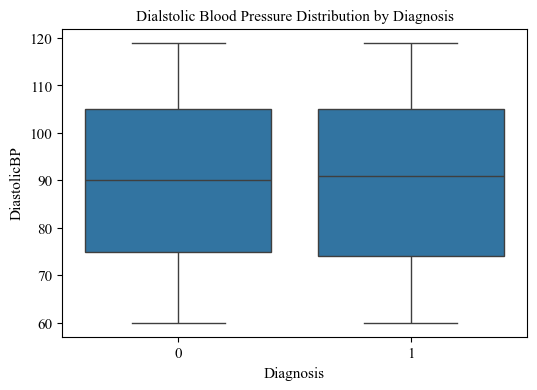

In [59]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Diagnosis', y='DiastolicBP', data=df)
plt.title('Dialstolic Blood Pressure Distribution by Diagnosis')
plt.show()

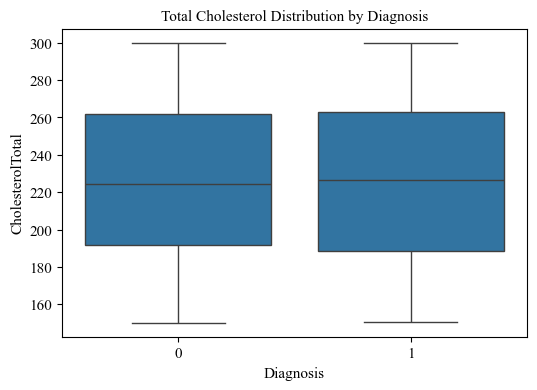

In [60]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Diagnosis', y='CholesterolTotal', data=df)
plt.title('Total Cholesterol Distribution by Diagnosis')
plt.show()

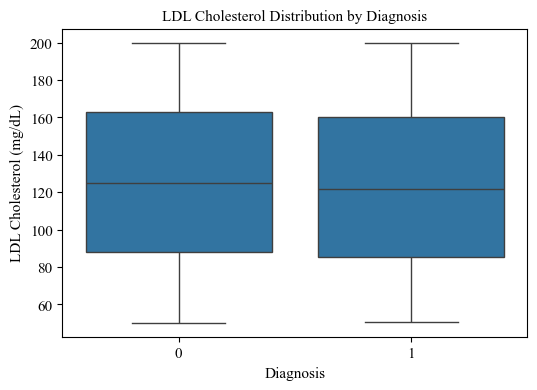

In [61]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Diagnosis', y='CholesterolLDL', data=df)
plt.title('LDL Cholesterol Distribution by Diagnosis')
plt.ylabel('LDL Cholesterol (mg/dL)')
plt.show()

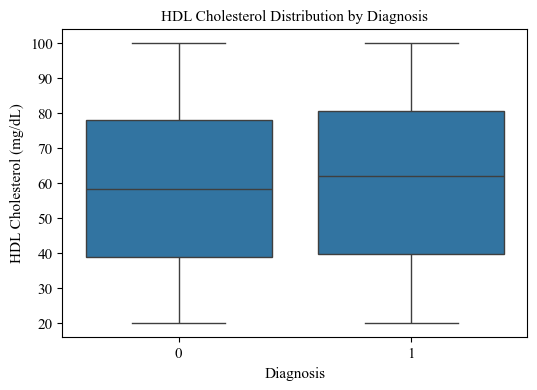

In [62]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Diagnosis', y='CholesterolHDL', data=df)
plt.title('HDL Cholesterol Distribution by Diagnosis')
plt.ylabel('HDL Cholesterol (mg/dL)')
plt.show()

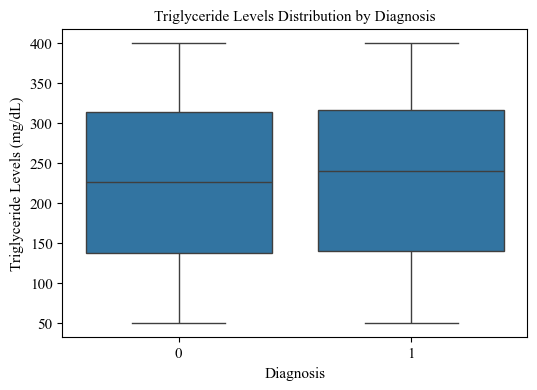

In [63]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Diagnosis', y='CholesterolTriglycerides', data=df)
plt.title('Triglyceride Levels Distribution by Diagnosis')
plt.ylabel('Triglyceride Levels (mg/dL)')
plt.show()

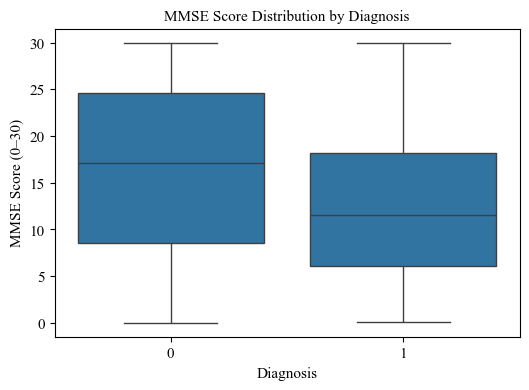

In [64]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Diagnosis', y='MMSE', data=df)
plt.title('MMSE Score Distribution by Diagnosis')
plt.ylabel('MMSE Score (0–30)')
plt.show()

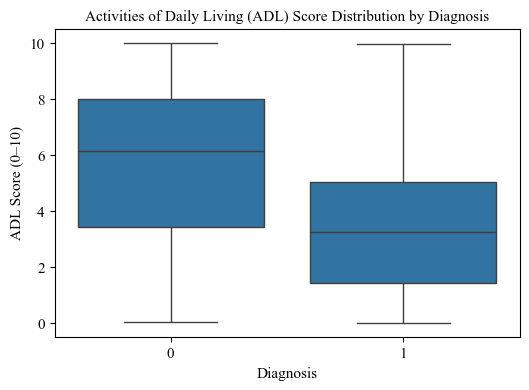

In [65]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Diagnosis', y='ADL', data=df)
plt.title('Activities of Daily Living (ADL) Score Distribution by Diagnosis')
plt.ylabel('ADL Score (0–10)')
plt.show()

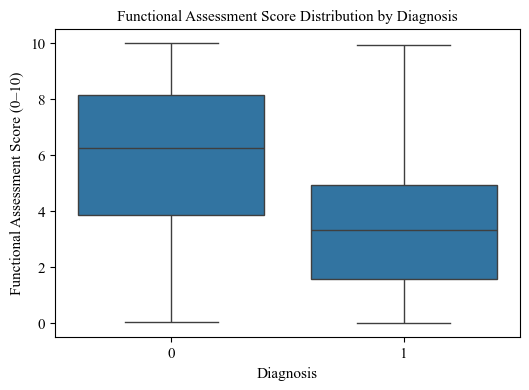

In [66]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Diagnosis', y='FunctionalAssessment', data=df)
plt.title('Functional Assessment Score Distribution by Diagnosis')
plt.ylabel('Functional Assessment Score (0–10)')
plt.show()

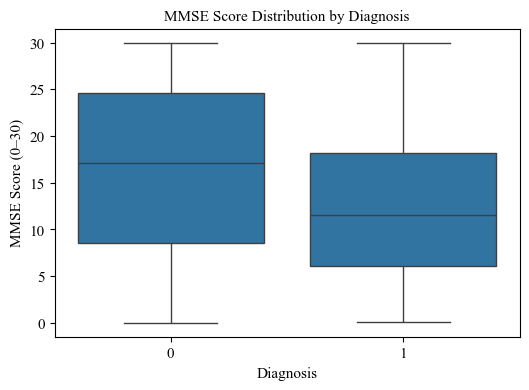

In [67]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Diagnosis', y='MMSE', data=df)
plt.title('MMSE Score Distribution by Diagnosis')
plt.ylabel('MMSE Score (0–30)')
plt.show()

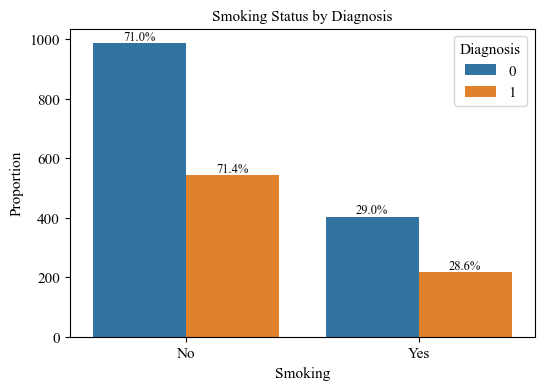

In [68]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Smoking', hue='Diagnosis', data=df)

for container in ax.containers:
    total = sum(bar.get_height() for bar in container)
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height/total:.1%}',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Proportion')
plt.title('Smoking Status by Diagnosis')
plt.show()


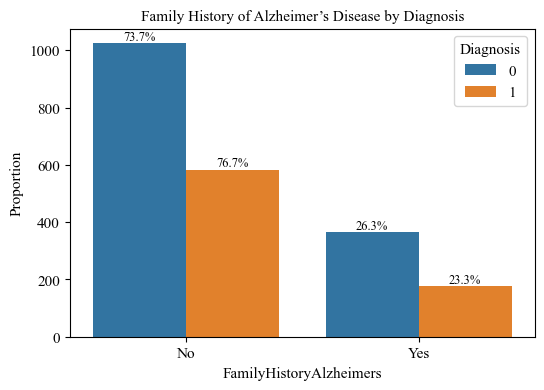

In [69]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='FamilyHistoryAlzheimers', hue='Diagnosis', data=df)

for container in ax.containers:
    total = sum(bar.get_height() for bar in container)
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height/total:.1%}',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Proportion')
plt.title('Family History of Alzheimer’s Disease by Diagnosis')
plt.show()


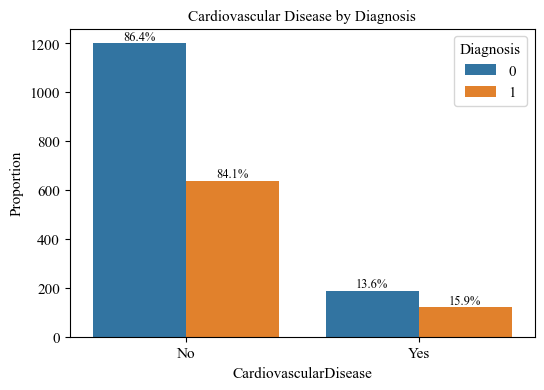

In [70]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='CardiovascularDisease', hue='Diagnosis', data=df)

for container in ax.containers:
    total = sum(bar.get_height() for bar in container)
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height/total:.1%}',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Proportion')
plt.title('Cardiovascular Disease by Diagnosis')
plt.show()


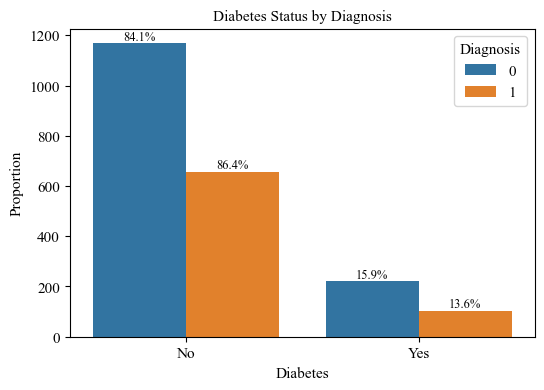

In [71]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Diabetes', hue='Diagnosis', data=df)

for container in ax.containers:
    total = sum(bar.get_height() for bar in container)
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height/total:.1%}',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Proportion')
plt.title('Diabetes Status by Diagnosis')
plt.show()


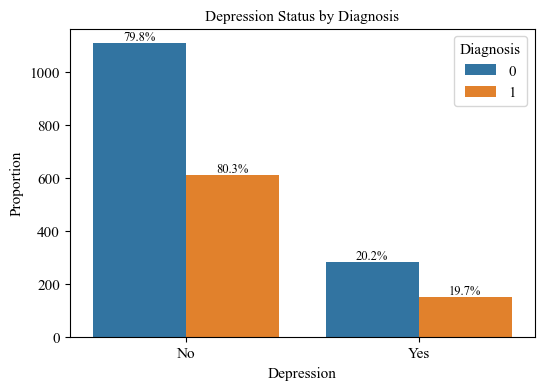

In [72]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Depression', hue='Diagnosis', data=df)

for container in ax.containers:
    total = sum(bar.get_height() for bar in container)
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height/total:.1%}',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Proportion')
plt.title('Depression Status by Diagnosis')
plt.show()


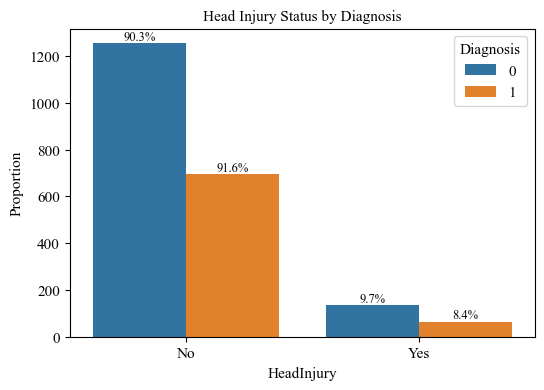

In [73]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='HeadInjury', hue='Diagnosis', data=df)

for container in ax.containers:
    total = sum(bar.get_height() for bar in container)
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height/total:.1%}',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Proportion')
plt.title('Head Injury Status by Diagnosis')
plt.show()

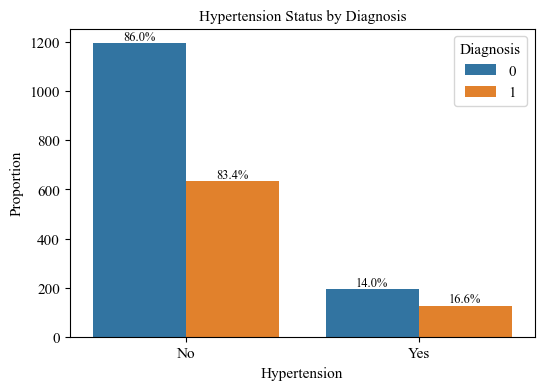

In [74]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Hypertension', hue='Diagnosis', data=df)

for container in ax.containers:
    total = sum(bar.get_height() for bar in container)
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height/total:.1%}',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Proportion')
plt.title('Hypertension Status by Diagnosis')
plt.show()

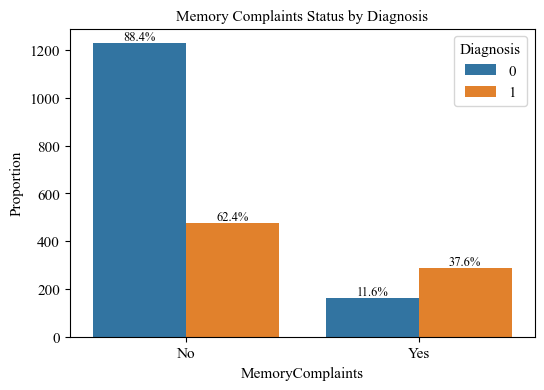

In [75]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='MemoryComplaints', hue='Diagnosis', data=df)

for container in ax.containers:
    total = sum(bar.get_height() for bar in container)
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height/total:.1%}',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Proportion')
plt.title('Memory Complaints Status by Diagnosis')
plt.show()

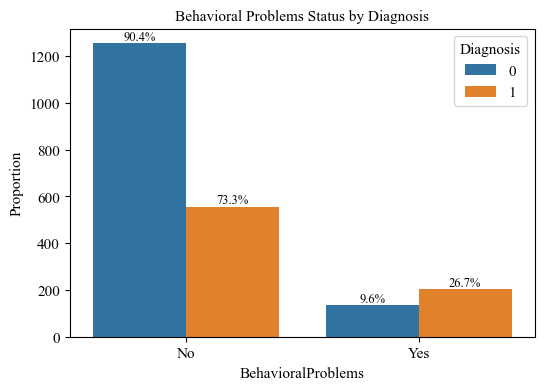

In [76]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='BehavioralProblems', hue='Diagnosis', data=df)

for container in ax.containers:
    total = sum(bar.get_height() for bar in container)
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height/total:.1%}',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Proportion')
plt.title('Behavioral Problems Status by Diagnosis')
plt.show()

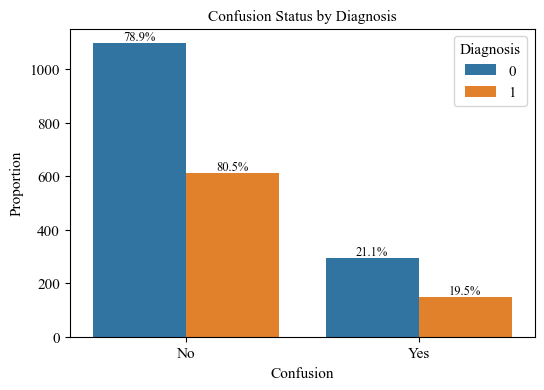

In [77]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Confusion', hue='Diagnosis', data=df)

for container in ax.containers:
    total = sum(bar.get_height() for bar in container)
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height/total:.1%}',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Proportion')
plt.title('Confusion Status by Diagnosis')
plt.show()

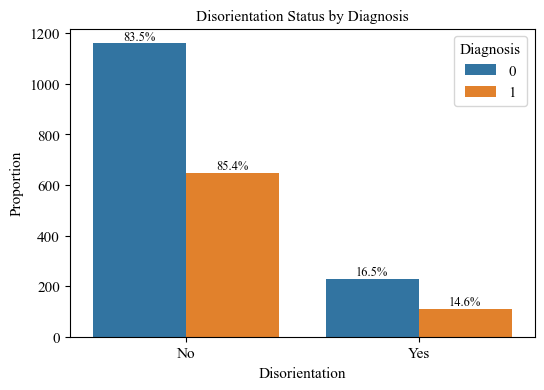

In [78]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Disorientation', hue='Diagnosis', data=df)

for container in ax.containers:
    total = sum(bar.get_height() for bar in container)
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height/total:.1%}',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Proportion')
plt.title('Disorientation Status by Diagnosis')
plt.show()

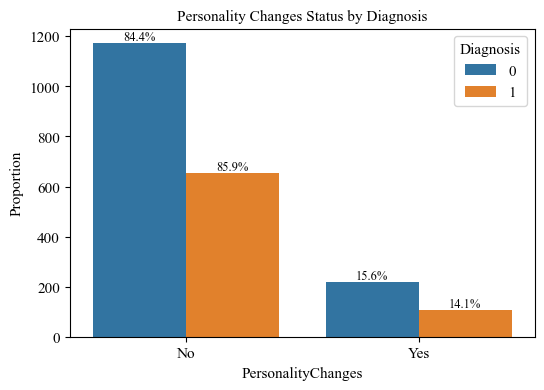

In [79]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='PersonalityChanges', hue='Diagnosis', data=df)

for container in ax.containers:
    total = sum(bar.get_height() for bar in container)
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height/total:.1%}',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Proportion')
plt.title('Personality Changes Status by Diagnosis')
plt.show()

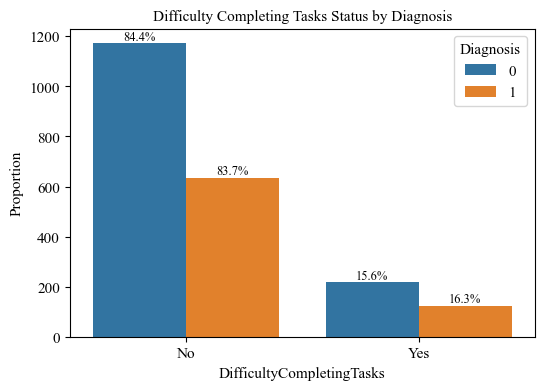

In [80]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='DifficultyCompletingTasks', hue='Diagnosis', data=df)

for container in ax.containers:
    total = sum(bar.get_height() for bar in container)
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height/total:.1%}',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Proportion')
plt.title('Difficulty Completing Tasks Status by Diagnosis')
plt.show()

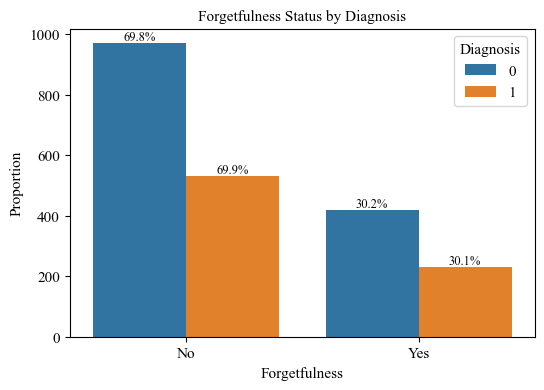

In [81]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Forgetfulness', hue='Diagnosis', data=df)

for container in ax.containers:
    total = sum(bar.get_height() for bar in container)
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height/total:.1%}',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Proportion')
plt.title('Forgetfulness Status by Diagnosis')
plt.show()

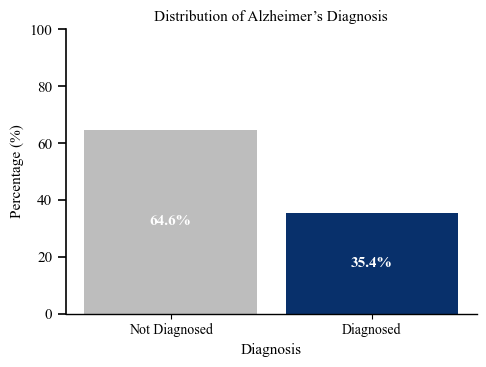

In [125]:
diagnosis_pct = df['Diagnosis'].value_counts(normalize=True) * 100
diagnosis_pct = diagnosis_pct.sort_index()


plt.figure(figsize=(5, 3.8))

bars = plt.bar(
    [0, 0.7],
    diagnosis_pct.values,
    width=0.6,
    color=["#bdbdbd", "#08306b"]
)

plt.title("Distribution of Alzheimer’s Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Percentage (%)")

plt.xticks(
    ticks=[0, 0.7],
    labels=["Not Diagnosed", "Diagnosed"],
    rotation=0
)

for bar, value in zip(bars, diagnosis_pct.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() / 2,
        f"{value:.1f}%",
        ha="center",
        va="center",
        color="white",
        fontsize=11,
        fontweight="bold"
    )

plt.ylim(0, 100)

ax = plt.gca()


ax.set_yticks([0, 20, 40, 60, 80, 100])
ax.tick_params(axis='y', length=6, width=1.2)

ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


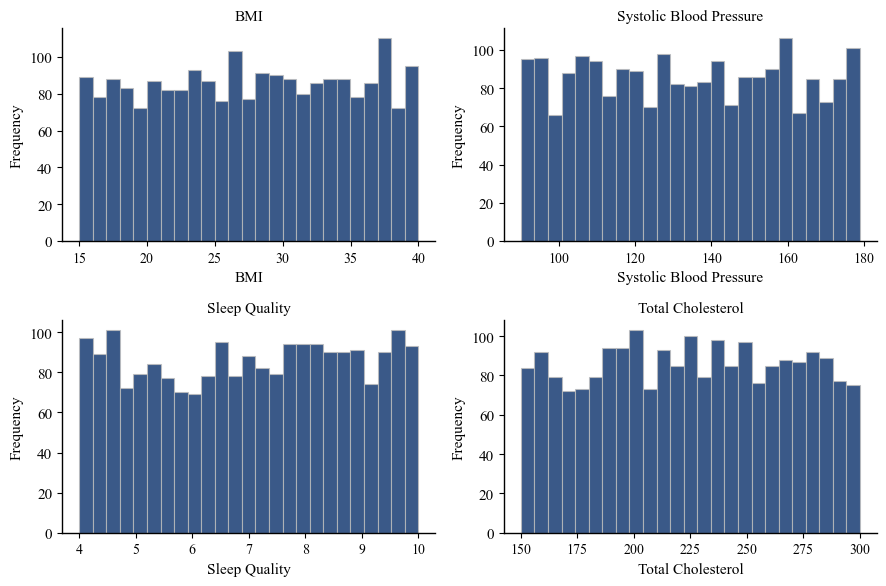

In [137]:
features = [
    ("BMI", "BMI"),
    ("SystolicBP", "Systolic Blood Pressure"),
    ("SleepQuality", "Sleep Quality"),
    ("CholesterolTotal", "Total Cholesterol"),
]

fig, axes = plt.subplots(2, 2, figsize=(9, 6))
axes = axes.flatten()

for ax, (col, label) in zip(axes, features):
    ax.hist(
        df[col],
        bins=25,
        color="#08306b",
        alpha=0.8,
        edgecolor="#bdbdbd",
        linewidth=0.8
    )

    ax.set_title(label)
    ax.set_xlabel(label)
    ax.set_ylabel("Frequency")

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_linewidth(1.0)
    ax.spines["bottom"].set_linewidth(1.0)

plt.tight_layout()
plt.show()


C:\Users\shirh\AppData\Local\Temp\ipykernel_3524\148320921.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(
C:\Users\shirh\AppData\Local\Temp\ipykernel_3524\148320921.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


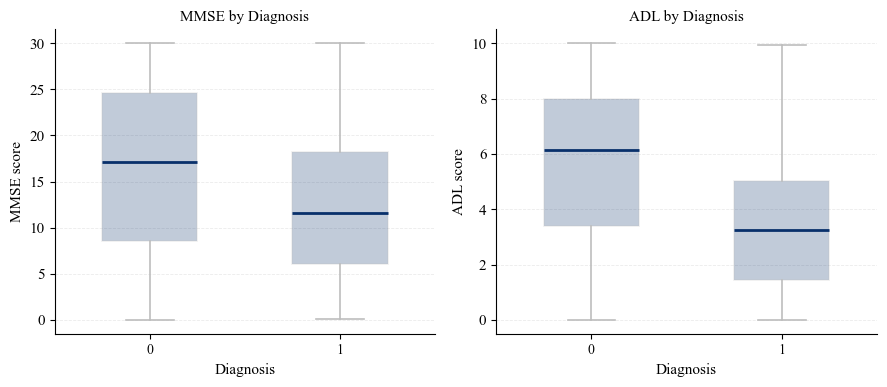

In [138]:

BLUE = "#08306b"
EDGE = "#bdbdbd"


mmse_0 = df.loc[df["Diagnosis"] == 0, "MMSE"].dropna()
mmse_1 = df.loc[df["Diagnosis"] == 1, "MMSE"].dropna()
adl_0  = df.loc[df["Diagnosis"] == 0, "ADL"].dropna()
adl_1  = df.loc[df["Diagnosis"] == 1, "ADL"].dropna()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

def draw_box(ax, data_0, data_1, title, ylabel):
    bp = ax.boxplot(
        [data_0, data_1],
        labels=["0", "1"],
        patch_artist=True,
        widths=0.5,
        showfliers=False  
    )

 
    for box in bp["boxes"]:
        box.set(facecolor=BLUE, alpha=0.25, edgecolor=EDGE, linewidth=1.2)
    for whisker in bp["whiskers"]:
        whisker.set(color=EDGE, linewidth=1.2)
    for cap in bp["caps"]:
        cap.set(color=EDGE, linewidth=1.2)
    for median in bp["medians"]:
        median.set(color=BLUE, linewidth=2)

    ax.set_title(title)
    ax.set_xlabel("Diagnosis")
    ax.set_ylabel(ylabel)


    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    
    ax.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.25)

draw_box(axes[0], mmse_0, mmse_1, "MMSE by Diagnosis", "MMSE score")
draw_box(axes[1], adl_0,  adl_1,  "ADL by Diagnosis",  "ADL score")

plt.tight_layout()
plt.show()

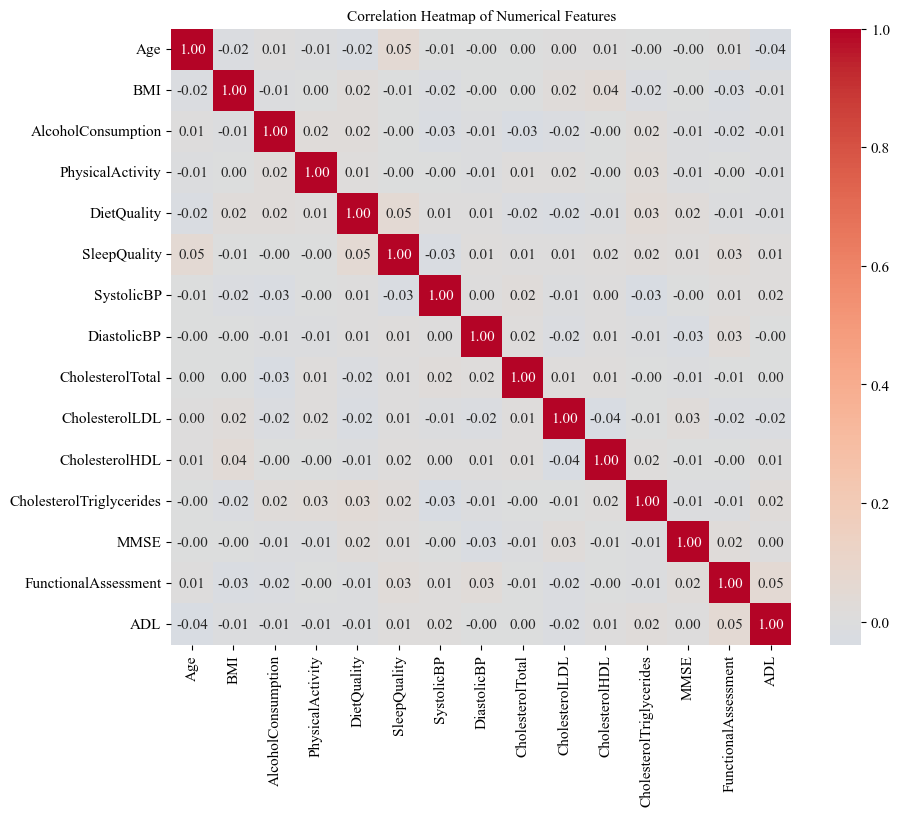

In [83]:
# Heatmap in order to see multicollinearity
numeric_features = ['Age','BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
                  'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL',
                   'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
                   'ADL']
corr = df[numeric_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0
)

plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Top features by |corr| with Diagnosis:


FunctionalAssessment       0.364898
ADL                        0.332346
MemoryComplaints           0.306742
MMSE                       0.237126
BehavioralProblems         0.224350
SleepQuality               0.056548
EducationLevel             0.043966
CholesterolHDL             0.042584
PatientID                  0.041019
Hypertension               0.035080
FamilyHistoryAlzheimers    0.032900
CholesterolLDL             0.031976
Name: Diagnosis, dtype: float64

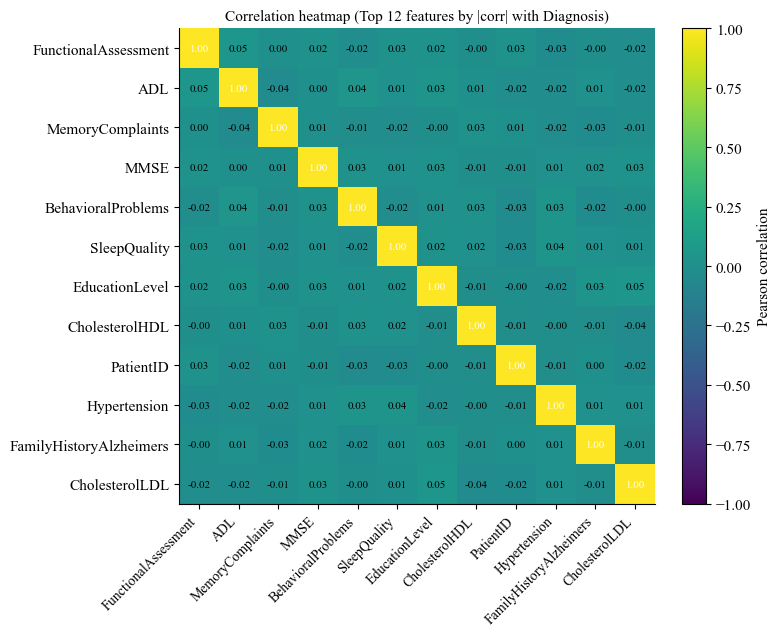

Pairs with |correlation| >= 0.85:


,Feature A,Feature B,Correlation


In [126]:


target = "Diagnosis"
top_n = 12               # אפשר לשנות ל-10/11/12
collinearity_thr = 0.85 

num_cols = df.select_dtypes(include="number").columns.tolist()
if target not in df.columns:
    raise ValueError("Diagnosis column not found")

num_cols_wo_target = [c for c in num_cols if c != target]

corr_to_target = (
    df[num_cols_wo_target + [target]]
    .corr(numeric_only=True)[target]
    .drop(target)
    .abs()
    .sort_values(ascending=False)
)

top_features = corr_to_target.head(top_n).index.tolist()

print("Top features by |corr| with Diagnosis:")
display(corr_to_target.head(top_n))

corr_mat = df[top_features].corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(8.5, 6.5))
im = ax.imshow(corr_mat.values, vmin=-1, vmax=1)

ax.set_xticks(np.arange(len(top_features)))
ax.set_yticks(np.arange(len(top_features)))
ax.set_xticklabels(top_features, rotation=45, ha="right")
ax.set_yticklabels(top_features)

cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Pearson correlation")

for i in range(len(top_features)):
    for j in range(len(top_features)):
        val = corr_mat.iat[i, j]

        # write correlation value
        ax.text(j, i, f"{val:.2f}", ha="center", va="center",
                color="white" if abs(val) > 0.5 else "black", fontsize=8)

        # highlight multicollinearity pairs 
        if i != j and abs(val) >= collinearity_thr:
            ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1,
                                       fill=False, edgecolor="black", linewidth=1.8))

ax.set_title(f"Correlation heatmap (Top {top_n} features by |corr| with Diagnosis)")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.tight_layout()
plt.show()

pairs = []
for i in range(len(top_features)):
    for j in range(i+1, len(top_features)):
        v = corr_mat.iat[i, j]
        if abs(v) >= collinearity_thr:
            pairs.append((top_features[i], top_features[j], v))

pairs_df = pd.DataFrame(pairs, columns=["Feature A", "Feature B", "Correlation"]).sort_values(
    by="Correlation", key=lambda s: s.abs(), ascending=False
)

print(f"Pairs with |correlation| >= {collinearity_thr}:")
display(pairs_df)

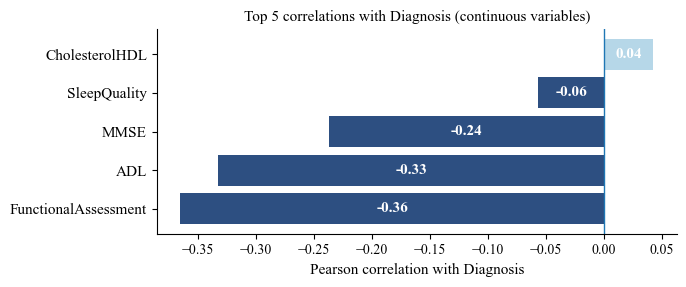

In [101]:
# Horizontal bar chart of Pearson correlations
continuous_candidates = [
    "Age","BMI","AlcoholConsumption","PhysicalActivity","DietQuality","SleepQuality",
    "SystolicBP","DiastolicBP","CholesterolTotal","CholesterolLDL","CholesterolHDL",
    "Triglycerides","CholesterolTriglycerides",
    "MMSE","FunctionalAssessment","ADL"
]

continuous = [c for c in continuous_candidates if c in df.columns]

if "Diagnosis" not in df.columns:
    raise ValueError("Column 'Diagnosis' was not found in the dataframe.")

if len(continuous) == 0:
    raise ValueError("No continuous variables were found. Check df.columns and update continuous_candidates.")


corr = (
    df[continuous + ["Diagnosis"]]
    .corr(numeric_only=True)["Diagnosis"]
    .drop("Diagnosis")
)

top_k = 5
corr_top = (
    corr.sort_values(key=lambda s: s.abs(), ascending=False)
        .head(top_k)
        .sort_values()  
)


NEG_COLOR = "#08306b"  # deep navy
POS_COLOR = "#9ecae1"  # light blue
ALPHA_NEG = 0.85
ALPHA_POS = 0.75

bar_colors = []
bar_alphas = []
for v in corr_top.values:
    if v < 0:
        bar_colors.append(NEG_COLOR)
        bar_alphas.append(ALPHA_NEG)
    else:
        bar_colors.append(POS_COLOR)
        bar_alphas.append(ALPHA_POS)

plt.figure(figsize=(7, 3))

bars = []
for name, val, col, a in zip(corr_top.index, corr_top.values, bar_colors, bar_alphas):
    b = plt.barh(name, val, color=col, alpha=a)
    bars.extend(b)

plt.axvline(0, linewidth=1)
plt.xlabel("Pearson correlation with Diagnosis")
plt.title("Top 5 correlations with Diagnosis (continuous variables)")

for bar in bars:
    width = bar.get_width()
    plt.text(
        width / 2,
        bar.get_y() + bar.get_height() / 2,
        f"{width:.2f}",
        va="center",
        ha="center",
        color="white",
        fontsize=11,
        fontweight="bold"
    )

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()



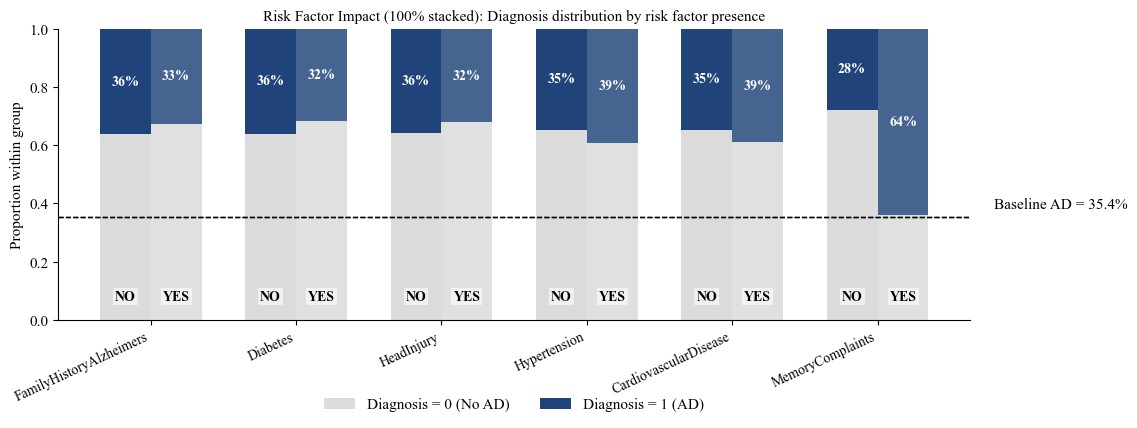

In [115]:
# Risk Factor Impact Stack bar

risk_factors = [
    "FamilyHistoryAlzheimers",
    "Diabetes",
    "HeadInjury",
    "Hypertension",
    "CardiovascularDisease",
    "MemoryComplaints"
]
target = "Diagnosis"

missing_cols = [c for c in risk_factors + [target] if c not in df.columns]
if missing_cols:
    raise ValueError(f"Missing columns in df: {missing_cols}")

baseline = df[target].mean()

rows = []
for rf in risk_factors:
    for state in [0, 1]:
        subset = df[df[rf] == state]
        p_ad = subset[target].mean() if len(subset) > 0 else np.nan
        rows.append({
            "RiskFactor": rf,
            "State": state,
            "P_AD": p_ad,
            "P_NoAD": 1 - p_ad if not np.isnan(p_ad) else np.nan
        })

cond = { (r["RiskFactor"], r["State"]): (r["P_NoAD"], r["P_AD"]) for r in rows }

no_ad_0 = np.array([cond[(rf,0)][0] for rf in risk_factors], dtype=float)
ad_0    = np.array([cond[(rf,0)][1] for rf in risk_factors], dtype=float)
no_ad_1 = np.array([cond[(rf,1)][0] for rf in risk_factors], dtype=float)
ad_1    = np.array([cond[(rf,1)][1] for rf in risk_factors], dtype=float)

x = np.arange(len(risk_factors))
bar_w = 0.35

COLOR_NOAD = "#d9d9d9"
COLOR_AD   = "#08306b"

fig, ax = plt.subplots(figsize=(11.5, 4.6))

ax.bar(x - bar_w/2, no_ad_0, width=bar_w, color=COLOR_NOAD, alpha=0.95)
ax.bar(x - bar_w/2, ad_0,    width=bar_w, bottom=no_ad_0, color=COLOR_AD, alpha=0.90)

ax.bar(x + bar_w/2, no_ad_1, width=bar_w, color=COLOR_NOAD, alpha=0.80)
ax.bar(x + bar_w/2, ad_1,    width=bar_w, bottom=no_ad_1, color=COLOR_AD, alpha=0.75)

ax.axhline(baseline, linestyle="--", linewidth=1, color="black")
ax.text(len(risk_factors)-0.2, baseline + 0.02, f"Baseline AD = {baseline:.1%}", ha="left", va="bottom")

ax.set_ylim(0, 1)
ax.set_ylabel("Proportion within group")
ax.set_title("Risk Factor Impact (100% stacked): Diagnosis distribution by risk factor presence")
ax.set_xticks(x)
ax.set_xticklabels(risk_factors, rotation=25, ha="right")

for i in range(len(risk_factors)):
    ax.text(
        x[i] - bar_w/2,
        0.08,
        "NO",
        ha="center",
        va="center",
        fontsize=10,
        fontweight="bold",
        color="black",
        bbox=dict(facecolor="white", edgecolor="none", alpha=0.6, pad=1.5)
    )
    ax.text(
        x[i] + bar_w/2,
        0.08,
        "YES",
        ha="center",
        va="center",
        fontsize=10,
        fontweight="bold",
        color="black",
        bbox=dict(facecolor="white", edgecolor="none", alpha=0.6, pad=1.5)
    )

for i in range(len(risk_factors)):
    if ad_0[i] > 0.06:
        ax.text(
            x[i] - bar_w/2,
            no_ad_0[i] + ad_0[i] / 2,
            f"{ad_0[i]:.0%}",
            ha="center",
            va="center",
            color="white",
            fontsize=10,
            fontweight="bold"
        )

    if ad_1[i] > 0.06:
        ax.text(
            x[i] + bar_w/2,
            no_ad_1[i] + ad_1[i] / 2,
            f"{ad_1[i]:.0%}",
            ha="center",
            va="center",
            color="white",
            fontsize=10,
            fontweight="bold"
        )

ax.axhline(baseline, linestyle="--", linewidth=1, color="black")

legend_handles = [
    Patch(facecolor=COLOR_NOAD, label="Diagnosis = 0 (No AD)", alpha=0.9),
    Patch(facecolor=COLOR_AD,   label="Diagnosis = 1 (AD)",    alpha=0.9),
]

ax.legend(
    handles=legend_handles,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),  
    ncol=2,
    frameon=False
)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout(rect=[0, 0.01, 1, 1])
plt.show()




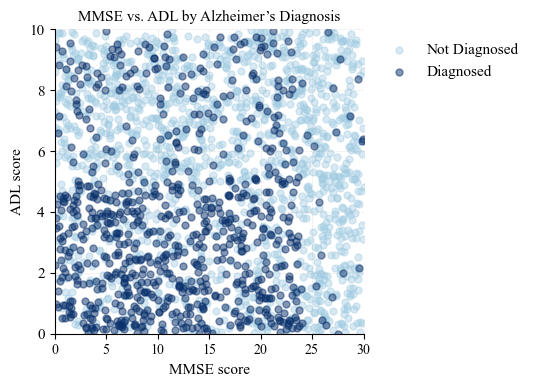

In [135]:
df_no_ad = df[df["Diagnosis"] == 0]
df_ad    = df[df["Diagnosis"] == 1]

plt.figure(figsize=(5.5, 4))

plt.scatter(
    df_no_ad["MMSE"],
    df_no_ad["ADL"],
    alpha=0.4,   # פחות צפוף
    s=25,        # נקודות קטנות יותר
    c="#9ecae1",
    label="Not Diagnosed"
)

plt.scatter(
    df_ad["MMSE"],
    df_ad["ADL"],
    alpha=0.5,
    s=25,
    c="#08306b",
    label="Diagnosed"
)


# Labels
plt.xlabel("MMSE score")
plt.ylabel("ADL score")
plt.title("MMSE vs. ADL by Alzheimer’s Diagnosis")

# Legend
plt.legend(frameon=False, loc="upper left", bbox_to_anchor=(1.02, 1))

# Clean look
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax = plt.gca()
ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.3)

plt.xlim(0, 30) 
plt.ylim(0, 10) 
plt.tight_layout()
plt.show()

In [130]:
# Data Quality Analysis 
# Checking that the values of variables that are supposed to be integers actually comply with this
df['Ethnicity'].unique()
df['EducationLevel'].unique()
df['Smoking'].unique()
df['FamilyHistoryAlzheimers'].unique()
df['CardiovascularDisease'].unique()
df['Diabetes'].unique()
df['Depression'].unique()
df['HeadInjury'].unique()
df['Hypertension'].unique()
df['MemoryComplaints'].unique()
df['BehavioralProblems'].unique()
df['Confusion'].unique()
df['Disorientation'].unique()
df['PersonalityChanges'].unique()
df['DifficultyCompletingTasks'].unique()
df['Forgetfulness'].unique()
df['Diagnosis'].unique()

array([0, 1])

In [85]:
# Data Quality Analysis
missing = df.isna().sum()
duplicates = df.duplicated().sum()
print(df.describe())

         PatientID          Age       Gender    Ethnicity  EducationLevel  \
count  2149.000000  2149.000000  2149.000000  2149.000000     2149.000000   
mean   5825.000000    74.908795     0.506282     0.697534        1.286645   
std     620.507185     8.990221     0.500077     0.996128        0.904527   
min    4751.000000    60.000000     0.000000     0.000000        0.000000   
25%    5288.000000    67.000000     0.000000     0.000000        1.000000   
50%    5825.000000    75.000000     1.000000     0.000000        1.000000   
75%    6362.000000    83.000000     1.000000     1.000000        2.000000   
max    6899.000000    90.000000     1.000000     3.000000        3.000000   

               BMI      Smoking  AlcoholConsumption  PhysicalActivity  \
count  2149.000000  2149.000000         2149.000000       2149.000000   
mean     27.655697     0.288506           10.039442          4.920202   
std       7.217438     0.453173            5.757910          2.857191   
min      15.00